# 2. EDA and Statistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas_profiling
pd.set_option('display.max_columns', None)

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Final Project/Dataset/ggg_20.csv')

In [3]:
data.shape

(153, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Global_rank                   153 non-null    int64  
 1   country                       153 non-null    object 
 2   code                          153 non-null    object 
 3   Region                        153 non-null    object 
 4   regional_indicator            153 non-null    object 
 5   Global_score                  153 non-null    float64
 6   Global_Delta_Rank_2018        149 non-null    object 
 7   Global_2018_Score_change      149 non-null    object 
 8   Global_2006_Score_change      115 non-null    float64
 9   P_rank                        153 non-null    int64  
 10  P_score                       153 non-null    float64
 11  E_O_rank                      153 non-null    int64  
 12  E_O_score                     153 non-null    float64
 13  E_ran

In [5]:
data = data.rename(columns={"hippiness_score": "happiness_score"})

In [6]:
numeric = data.select_dtypes(include=np.number)

In [7]:
numeric_clean = numeric.dropna(subset=['happiness_score'])

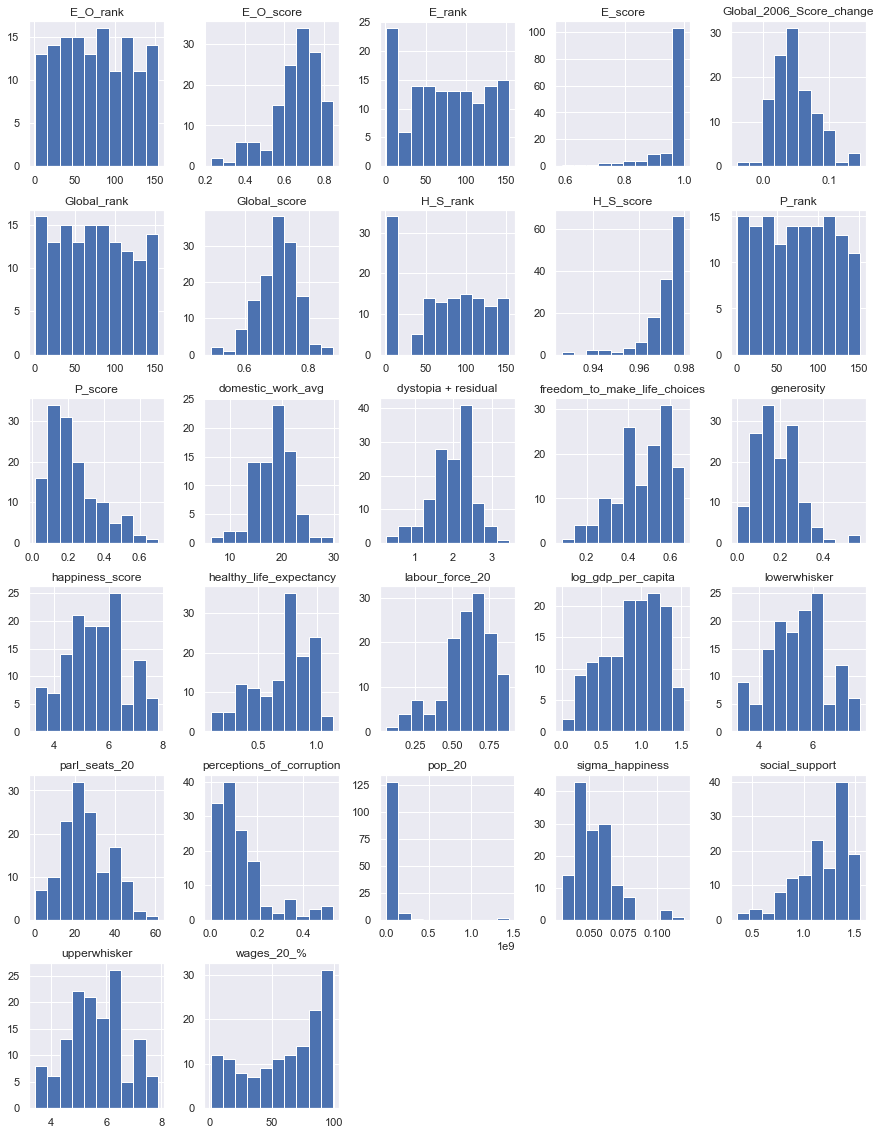

In [63]:
numeric_clean.hist(figsize = (15,20));

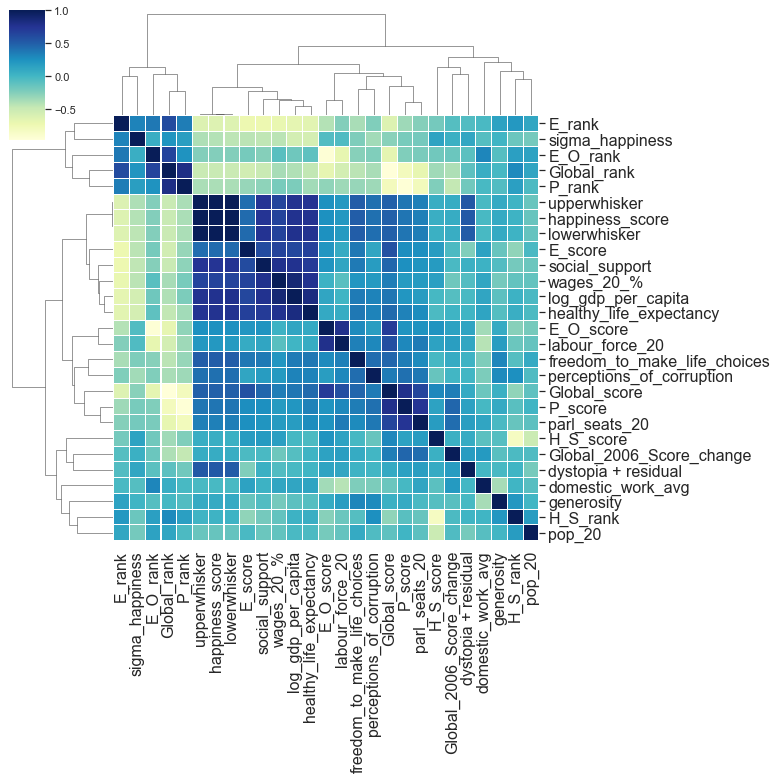

In [64]:
corrmat = numeric_clean.corr() 
map_corr= sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(map_corr.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
map_corr.ax_heatmap.set_xticklabels(map_corr.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
map_corr.ax_heatmap.set_yticklabels(map_corr.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

map_corr
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [8]:
numeric_clean.columns

Index(['Global_rank', 'Global_score', 'Global_2006_Score_change', 'P_rank',
       'P_score', 'E_O_rank', 'E_O_score', 'E_rank', 'E_score', 'H_S_rank',
       'H_S_score', 'pop_20', 'wages_20_%', 'parl_seats_20',
       'domestic_work_avg', 'labour_force_20', 'happiness_score',
       'sigma_happiness', 'upperwhisker', 'lowerwhisker', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia + residual'],
      dtype='object')

In [9]:
just_happiness = numeric_clean[['labour_force_20', 'happiness_score', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia + residual']]

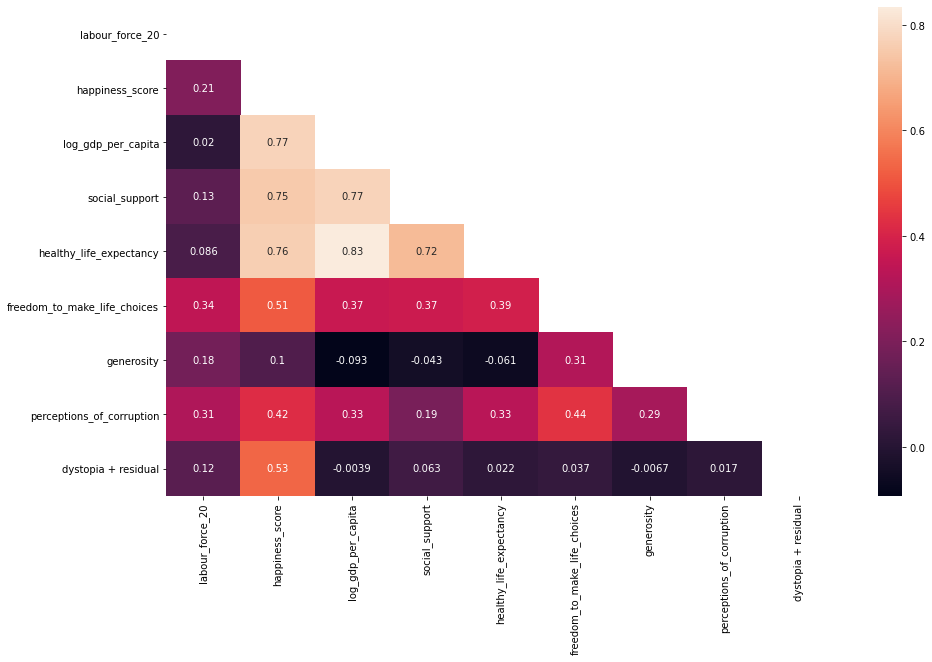

In [10]:
corrmat = just_happiness.corr() 
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corrmat, mask=mask, annot=True)
plt.show()

### The happiness score is highly correlated with the GDP_per_capita, healthy_life_expectancy, social support

In [11]:
just_gender_gap = numeric_clean[['Global_score', 'Global_2006_Score_change',
       'P_score', 'E_O_score', 'E_score',
       'H_S_score', 'pop_20', 'wages_20_%', 'parl_seats_20',
       'domestic_work_avg', 'labour_force_20']]

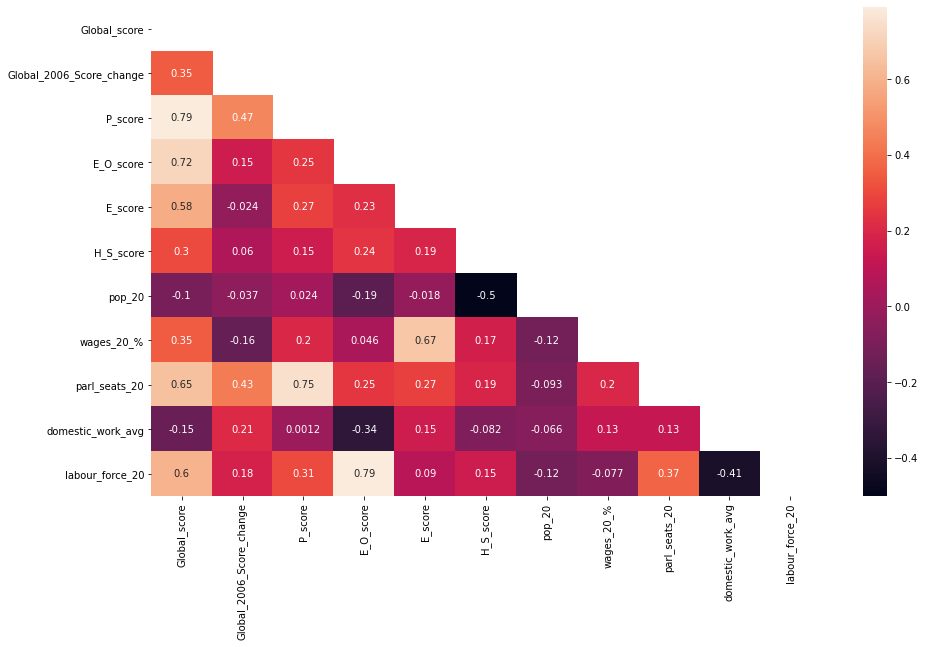

In [12]:
corrmat = just_gender_gap.corr() 
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(corrmat, mask=mask, annot=True)
plt.show()

### Global gender gap score is highly correlated withP_score, E_o_score, parl_seats

## Global Gender score and Happiness score are correlated?

In [13]:
Y = just_happiness['happiness_score']
X = just_gender_gap['Global_score']  
X = sm.add_constant(X)
model_2 = sm.OLS(Y,X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     44.23
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           6.64e-10
Time:                        16:55:34   Log-Likelihood:                -185.25
No. Observations:                 137   AIC:                             374.5
Df Residuals:                     135   BIC:                             380.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5572      0.922     -0.604   

### The correlations is extremly significant, P-value < 0.0001

## Correlations between happiness score and the subcategories of the global gender gap index 

In [14]:
#I drop everything that belongs to the happiness score index to avoid multicollinearity and some columns i don't need
#I drop also 'domestic_work_avg' and 'Global_2006_Score_change', because they have too many null values

#numeric_happiness = numeric_clean.drop(['Global_rank', 'P_rank', 'E_O_rank', 'E_rank', 'H_S_rank',  'sigma_happiness', 'upperwhisker', 'lowerwhisker', 'log_gdp_per_capita',
       #'social_support', 'healthy_life_expectancy',
       #'freedom_to_make_life_choices', 'generosity',
       #'perceptions_of_corruption', 'dystopia + residual', 'domestic_work_avg', 'Global_2006_Score_change'], axis=1)

In [15]:
just_happiness.columns

Index(['labour_force_20', 'happiness_score', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia + residual'],
      dtype='object')

In [16]:
just_gender_gap.columns

Index(['Global_score', 'Global_2006_Score_change', 'P_score', 'E_O_score',
       'E_score', 'H_S_score', 'pop_20', 'wages_20_%', 'parl_seats_20',
       'domestic_work_avg', 'labour_force_20'],
      dtype='object')

In [17]:
Y = just_happiness['happiness_score']
X = just_gender_gap[['P_score', 'E_O_score',
       'E_score', 'pop_20', 'wages_20_%', 'parl_seats_20', 'labour_force_20']]  #I had to not consider H_S and because it has two missing values
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     23.10
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           4.44e-20
Time:                        16:55:34   Log-Likelihood:                -149.00
No. Observations:                 137   AIC:                             314.0
Df Residuals:                     129   BIC:                             337.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.1325      0.989     

### Wages are extremly significant, P_score significant

In [18]:
happiness = pd.concat([X, Y], axis=1).reset_index(drop=True)
#happiness

In [19]:
happiness = happiness.drop(['const'], axis=1) 

## Which gender gap subcategory correlates the most with the Happiness Score (visually)

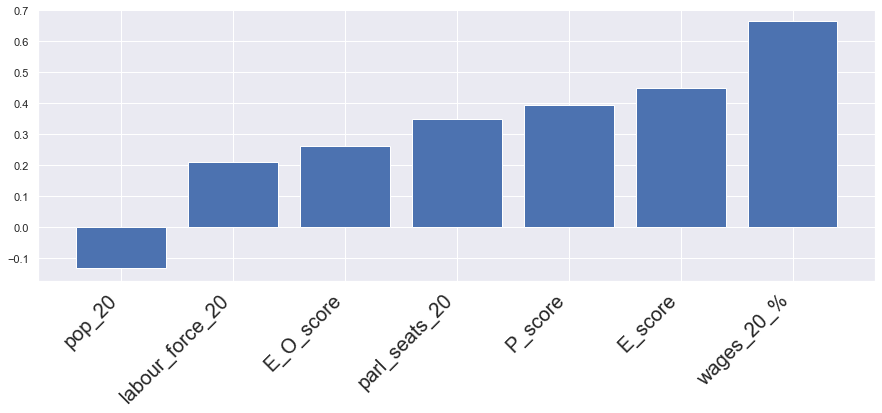

In [20]:
corr_hap=pd.DataFrame(happiness.corr(method='pearson').loc['happiness_score',:])

corr_hap.sort_values(by='happiness_score', inplace=True)
corr_hap.drop(['happiness_score'],inplace=True)

sns.set()
f, ax = plt.subplots(figsize=(15,5))
plt.bar(corr_hap.index,corr_hap['happiness_score'])
plt.xticks(rotation=45,fontsize=20, horizontalalignment="right");

## Correlations between gender gap index and the subcategories of the happiness index

In [22]:
#I drop everything that belongs to the gender gap index (subcategories) to avoid multicollinearity and some columns i don't need
#I drop also 'domestic_work_avg', because they have too many null values

numeric_gender_gap = numeric_clean.drop(['Global_2006_Score_change', 'P_score', 'E_O_score',
       'E_score', 'H_S_score','Global_rank', 'P_rank', 'E_O_rank', 'E_rank', 'H_S_rank', 'sigma_happiness', 'upperwhisker', 'lowerwhisker', 'domestic_work_avg'], axis=1)

In [23]:
just_happiness.columns

Index(['labour_force_20', 'happiness_score', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia + residual'],
      dtype='object')

In [24]:
just_gender_gap.columns

Index(['Global_score', 'Global_2006_Score_change', 'P_score', 'E_O_score',
       'E_score', 'H_S_score', 'pop_20', 'wages_20_%', 'parl_seats_20',
       'domestic_work_avg', 'labour_force_20'],
      dtype='object')

In [25]:
Y = just_gender_gap['Global_score']
X = just_happiness[['labour_force_20', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia + residual']]  
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_score   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     21.23
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           3.07e-20
Time:                        16:55:35   Log-Likelihood:                 245.07
No. Observations:                 137   AIC:                            -472.1
Df Residuals:                     128   BIC:                            -445.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Labour force is extremly significant followed by social support, freedom to make life choices and healthy life expectancy are significant

In [26]:
gender_gap = pd.concat([X, Y], axis=1).reset_index(drop=True)
gender_gap

,const,labour_force_20,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia + residual,Global_score
0,1.0,0.5610,0.91,0.83,0.85,0.46,0.17,0.03,1.64,0.769
1,1.0,0.1700,0.94,1.14,0.75,0.08,0.12,0.13,1.84,0.634
2,1.0,0.5530,1.03,1.37,0.85,0.52,0.07,0.06,2.07,0.746
3,1.0,0.5880,0.81,1.03,0.78,0.38,0.11,0.10,1.47,0.684
4,1.0,0.7230,1.31,1.48,1.02,0.62,0.32,0.34,2.13,0.731
...,...,...,...,...,...,...,...,...,...,...
132,1.0,0.5500,0.77,1.35,0.77,0.27,0.09,0.06,1.74,0.713
133,1.0,0.7960,0.72,1.25,0.82,0.65,0.14,0.09,1.69,0.700
134,1.0,0.0572,0.39,1.18,0.42,0.24,0.09,0.09,1.12,0.494
135,1.0,0.7120,0.54,0.90,0.36,0.49,0.25,0.09,1.13,0.731


In [27]:
gender_gap = gender_gap.drop(['const'], axis=1) 

## Which happiness score subcategory correlates the most with the Gender Gap score (visually)

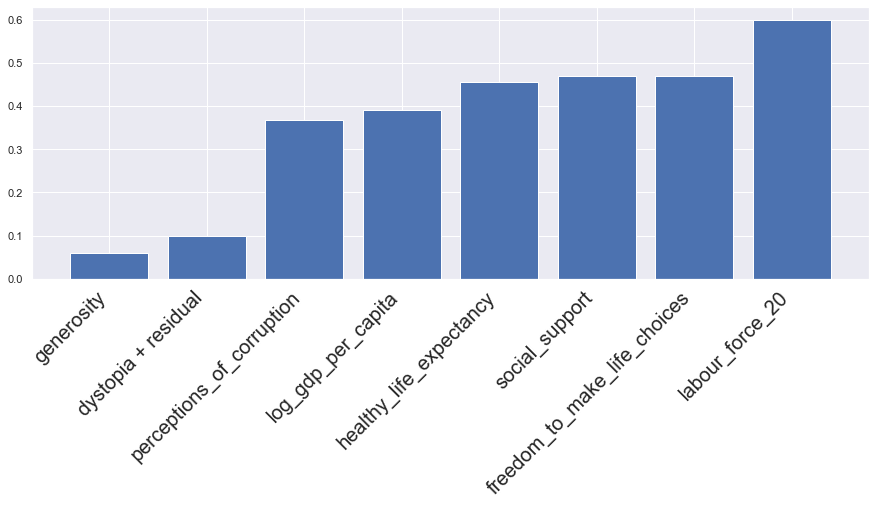

In [28]:
# Generate a data frame  with the correlation between the attributes and select a data frame (corr_stress) having only the correclation to
#Global gender gap score

corr_gend_gap=pd.DataFrame(gender_gap.corr(method='pearson').loc['Global_score',:])

corr_gend_gap.sort_values(by='Global_score', inplace=True)
corr_gend_gap.drop(['Global_score'],inplace=True)

sns.set()
f, ax = plt.subplots(figsize=(15,5))
plt.bar(corr_gend_gap.index,corr_gend_gap['Global_score'])
plt.xticks(rotation=45,fontsize=20, horizontalalignment="right");

## Subsetting the dataset based on subregional indicators

In [43]:
data_clean = data.dropna(subset=['happiness_score'])

In [44]:
sub_regional_indicator = data_clean['regional_indicator'].unique().tolist()

In [56]:
def subindicator_df(sub_regional_indicator):
    df =data_clean[data_clean['regional_indicator']== sub_regional_indicator]
    df_num = df.select_dtypes(include=np.number)
    df_num = df_num.drop(['Global_rank', 'P_rank','P_score', 'E_O_rank', 'E_O_score', 'E_score', 'E_rank', 'H_S_rank', 'H_S_score', 'sigma_happiness', 'upperwhisker', 'lowerwhisker',
                          'domestic_work_avg', 'Global_2006_Score_change', 'happiness_score'], axis=1)
    
    corr_happiness=pd.DataFrame(df_num.corr(method='pearson').loc['Global_score',:])

    corr_happiness.sort_values(by='Global_score', inplace=True)
    corr_happiness.drop(['Global_score'],inplace=True)
    return corr_happiness

In [57]:
south_asia = subindicator_df('South Asia')
est_eu_balcan= subindicator_df('Eastern Europe and Central Asia')
mid_est_n_africa = subindicator_df('Middle East and North Africa')
subsahra_africa = subindicator_df('Sub-Saharan Africa')
latin_america = subindicator_df('Latin America and Caribbean')
east_pacific = subindicator_df('East Asia_Pacific')
EU_USA = subindicator_df('Europe and North America')

In [58]:
south_asia = south_asia.rename(columns={"Global_score": "south_asia"})
est_eu_balcan = est_eu_balcan.rename(columns={"Global_score": "est_eu_balcan"})
mid_est_n_africa = mid_est_n_africa.rename(columns={"Global_score": "mid_est_n_africa"})
subsahra_africa = subsahra_africa.rename(columns={"Global_score": "subsahra_africa"})
latin_america = latin_america.rename(columns={"Global_score": "latin_america"})
east_pacific = east_pacific.rename(columns={"Global_score": "east_pacific"})
EU_USA = EU_USA.rename(columns={"Global_score": "EU_USA"})

In [59]:
dfs = [south_asia, est_eu_balcan , mid_est_n_africa, subsahra_africa, latin_america, east_pacific, EU_USA]
nan_value = 0
happiness_vs_gender_gap = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
happiness_vs_gender_gap

,south_asia,est_eu_balcan,mid_est_n_africa,subsahra_africa,latin_america,east_pacific,EU_USA
dystopia + residual,-0.546773,-0.038822,0.517714,-0.627043,0.169278,0.618502,0.395625
generosity,-0.122848,-0.129684,0.274552,-0.292708,-0.012113,0.053976,0.261655
log_gdp_per_capita,-0.110797,0.448538,0.552315,0.265512,0.078155,0.055102,0.315348
wages_20_%,-0.021341,0.324379,0.451216,0.357726,0.151931,0.099629,0.434047
pop_20,0.003490,-0.106430,-0.198941,-0.143377,-0.150744,-0.248051,-0.177255
social_support,0.015977,0.108711,0.293785,0.214786,0.207713,0.423807,0.697519
parl_seats_20,0.065984,0.477458,0.445756,0.691729,0.603900,0.834771,0.635013
labour_force_20,0.273402,0.312880,0.779230,0.315233,0.043306,0.154485,0.724752
perceptions_of_corruption,0.274638,-0.212180,0.224737,0.333160,0.093462,0.490103,0.501418
healthy_life_expectancy,0.425743,0.360352,0.756518,0.403695,0.383515,0.003608,0.169001


In [61]:
dfs_final = [happiness_vs_gender_gap,corr_gend_gap, corr_hap]
nan_value = 0
corr_matrix = pd.concat(dfs_final, join='outer', axis=1).fillna(nan_value)
corr_matrix

,south_asia,est_eu_balcan,mid_est_n_africa,subsahra_africa,latin_america,east_pacific,EU_USA,Global_score,happiness_score
dystopia + residual,-0.546773,-0.038822,0.517714,-0.627043,0.169278,0.618502,0.395625,0.097739,0.000000
generosity,-0.122848,-0.129684,0.274552,-0.292708,-0.012113,0.053976,0.261655,0.060036,0.000000
log_gdp_per_capita,-0.110797,0.448538,0.552315,0.265512,0.078155,0.055102,0.315348,0.390149,0.000000
wages_20_%,-0.021341,0.324379,0.451216,0.357726,0.151931,0.099629,0.434047,0.000000,0.665088
pop_20,0.003490,-0.106430,-0.198941,-0.143377,-0.150744,-0.248051,-0.177255,0.000000,-0.132952
social_support,0.015977,0.108711,0.293785,0.214786,0.207713,0.423807,0.697519,0.470226,0.000000
parl_seats_20,0.065984,0.477458,0.445756,0.691729,0.603900,0.834771,0.635013,0.000000,0.348804
labour_force_20,0.273402,0.312880,0.779230,0.315233,0.043306,0.154485,0.724752,0.600229,0.211217
perceptions_of_corruption,0.274638,-0.212180,0.224737,0.333160,0.093462,0.490103,0.501418,0.368689,0.000000
healthy_life_expectancy,0.425743,0.360352,0.756518,0.403695,0.383515,0.003608,0.169001,0.455119,0.000000


In [62]:
corr_matrix.to_csv(r'/Users/claudia/Ironhack/Final Project/Dataset/corr_final.csv')